In [1]:
%load_ext autoreload
%autoreload 2
# %load_ext nb_black
import ncxt_sxtcnn

In [2]:
import logging

logger = logging.getLogger("ncxt_sxtcnn.sxtcnn").setLevel(logging.INFO)

In [3]:
from ncxt_sxtcnn.sxtcnn.loaders import (
    AmiraLoaderx100,
    CascadeAmiraLoader,
    OneHotCascadeAmiraLoader,
)
from ncxt_sxtcnn.sxtcnn.models import UNet3D
from ncxt_sxtcnn.sxtcnn.processors import RandomBlockProcessor
from ncxt_sxtcnn.sxtcnn.criteria import CrossEntropyLoss_DiceLoss

### Setup Database

In [4]:
from ncxt_sxtcnn.hxdatabase import Database

db = Database("mockdata/")
membrane = ["membrane"]
nucleus = ["euchromatin", "heterochromatin", "nucleus"]
nucleolus = ["nucleolus"]
hxfiles = db.filelist(membrane, nucleus, nucleolus)
db.dataframe_sel(membrane, nucleus)

mockdata/


C:\Users\axela\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,project,sample,void,void1,nucleus,nucleolus,granule,mitochondria,lipid,endoplasmic reticulum,membrane,ignore
0,pi1,sample_12,0,1,2,3,4,5,6,7,8,9
1,pi2,sample_9,0,,1,5,,3,2,4,6,


In [5]:
nucleus + nucleolus

['euchromatin', 'heterochromatin', 'nucleus', 'nucleolus']

### First network

In [6]:
from ncxt_sxtcnn import Segmenter

files = db.filelist(membrane, nucleus, nucleolus)
features = [["*"], nucleus + nucleolus]
working_directory = "C:/Users/axela/Documents/2020/example_wd/"

loader_args = {"files": files, "features": features}

processor_args = {"block_shape": (32, 32, 32), "binning": 2, "pad": 16}

model_args = {
    "num_classes": len(features) + 1,
    "depth": 3,
    "start_filts": 32,
    "dropout": None,
    "instancenorm": True,
}
crit_args = dict()
settings = {"maximum_iterations": 100}

segmenter = Segmenter(
    AmiraLoaderx100,
    RandomBlockProcessor,
    UNet3D,
    CrossEntropyLoss_DiceLoss,
    loader_args,
    processor_args,
    model_args,
    crit_args,
    settings,
)
segmenter.folder = working_directory
segmenter.fold = 0

instance = segmenter.sxtcnn(0)
instance.settings.reset = True
instance._init_data()

INFO     [sxtcnn.py:410] Data folder C:\Users\axela\Documents\2020\example_wd\data27213\train already exists
INFO     [sxtcnn.py:417] Initializing data: C:\Users\axela\Documents\2020\example_wd\data27213
INFO     [sxtcnn.py:418] Training: [0 1]
INFO     [sxtcnn.py:419] Vsalidation: [0 1]


INFO     [sxtcnn.py:393] Setting device to cuda:0


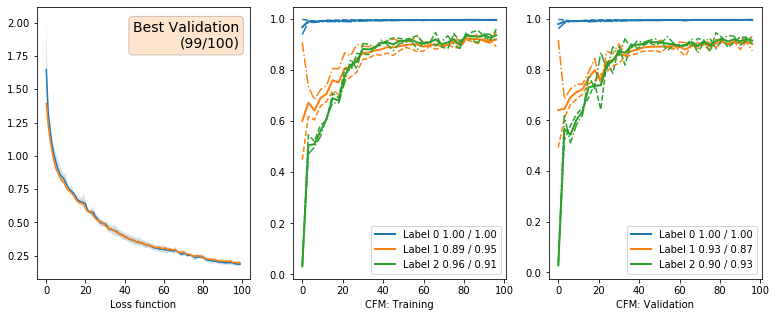

In [7]:
instance.run()
instance.logger.plot()

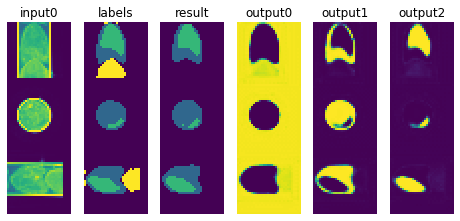

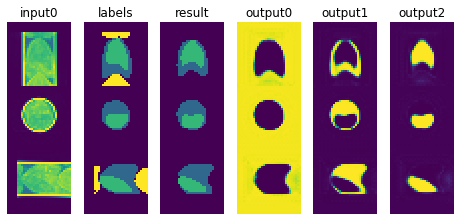

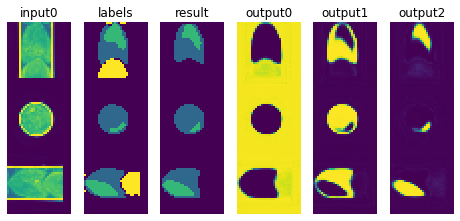

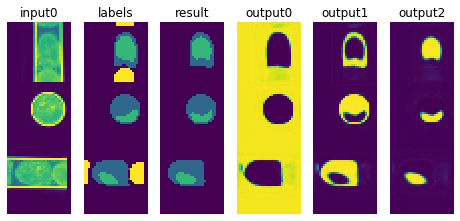

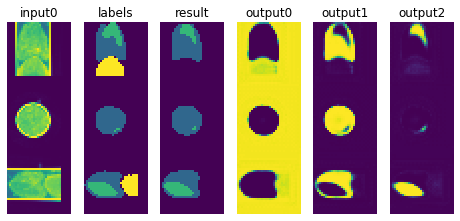

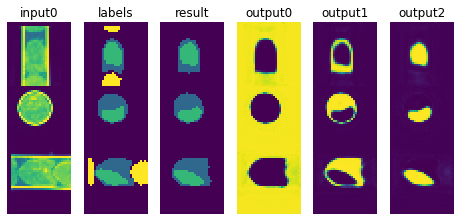

In [8]:
for index in range(3):
    instance.show_training_data(index, mode="train")
    instance.show_training_data(index, mode="validation")

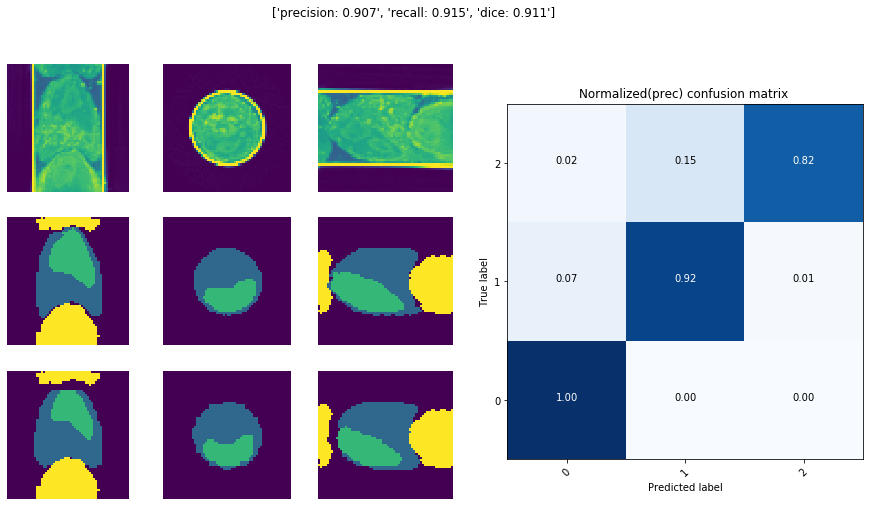

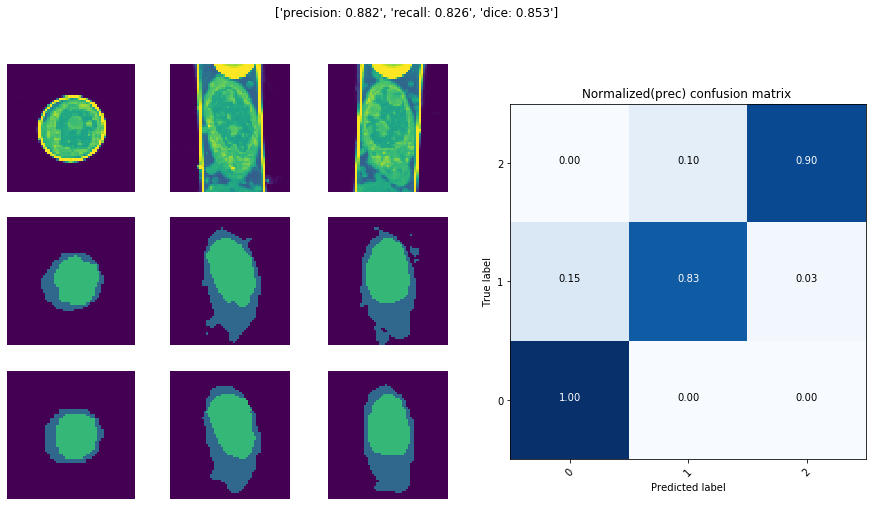

In [9]:
for index in instance.valid_idx:
    _ = instance.evaluate_sample(index, plot=True)

### Cascading network

In [10]:
from ncxt_sxtcnn import Segmenter
files = db.filelist(membrane,nucleus,nucleolus)
features = [['*'],nucleus,nucleolus]
working_directory = 'C:/Users/axela/Documents/2020/example_wd/'

loader_args = {'files': files,
               'segmenter': instance,
             'features': features}

processor_args = {'block_shape': (32, 32, 32),
                  'binning': 1,
                  }

model_args = {
    'in_channels':instance.model.num_classes,
    'num_classes':len(features)+1,
    'depth': 3,
    'start_filts': 32,
    'dropout': None,
    'instancenorm': True,
}
crit_args = dict()
settings = {'maximum_iterations':100}

segmenter = Segmenter(CascadeAmiraLoader, 
                      RandomBlockProcessor, 
                      UNet3D, 
                      CrossEntropyLoss_DiceLoss,
                      loader_args,
                      processor_args,
                      model_args,
                      crit_args,
                      settings,
                     )
segmenter.folder = working_directory
segmenter.fold =0

INFO     [sxtcnn.py:410] Data folder C:\Users\axela\Documents\2020\example_wd\data11258\train already exists
INFO     [sxtcnn.py:417] Initializing data: C:\Users\axela\Documents\2020\example_wd\data11258
INFO     [sxtcnn.py:418] Training: [0 1]
INFO     [sxtcnn.py:419] Vsalidation: [0 1]


INFO     [sxtcnn.py:393] Setting device to cuda:0


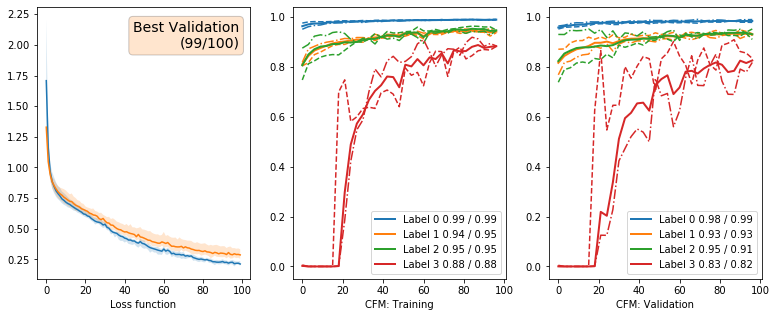

In [11]:
instance_c = segmenter.sxtcnn(0)
instance_c.settings.reset = True
instance_c._init_data()
instance_c.run()
instance_c.logger.plot()

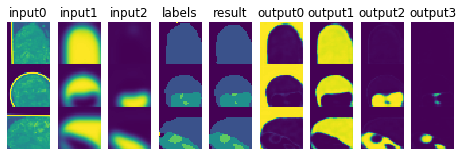

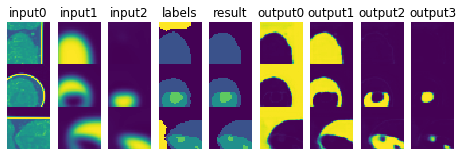

In [12]:
instance_c.show_training_data(mode="train")
instance_c.show_training_data(mode="validation")

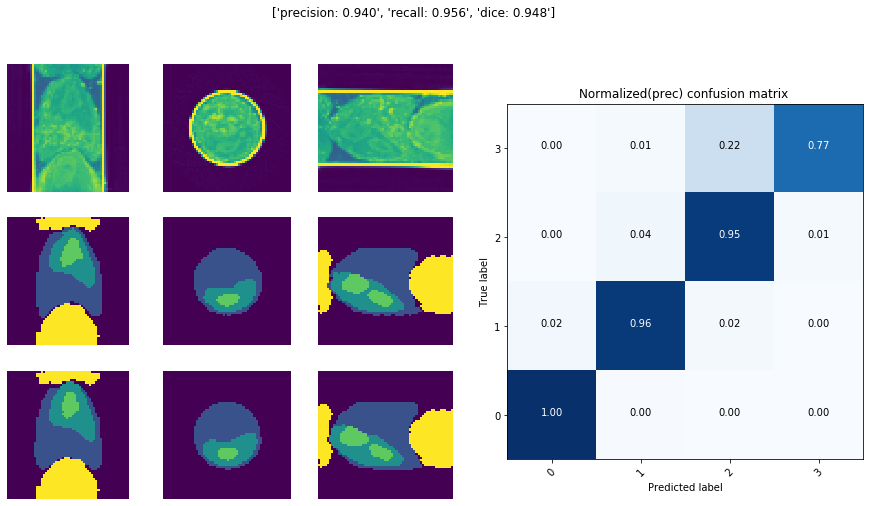

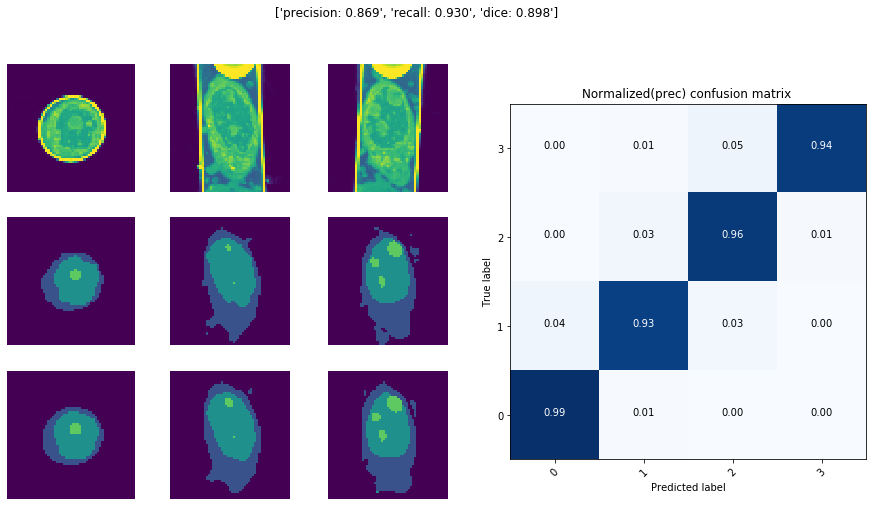

In [13]:
for index in instance_c.valid_idx:
    _ = instance_c.evaluate_sample(index, plot=True)

INFO     [sxtcnn.py:410] Data folder C:\Users\axela\Documents\2020\example_wd\data27561\train already exists
INFO     [sxtcnn.py:417] Initializing data: C:\Users\axela\Documents\2020\example_wd\data27561
INFO     [sxtcnn.py:418] Training: [0 1]
INFO     [sxtcnn.py:419] Vsalidation: [0 1]


INFO     [sxtcnn.py:393] Setting device to cuda:0


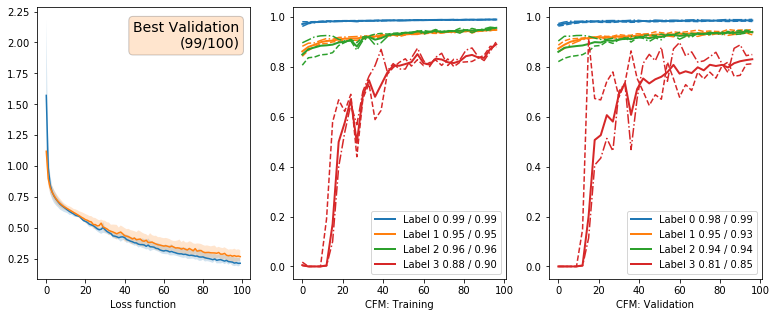

In [14]:
segmenter1 = Segmenter(OneHotCascadeAmiraLoader, 
                      RandomBlockProcessor, 
                      UNet3D, 
                      CrossEntropyLoss_DiceLoss,
                      loader_args,
                      processor_args,
                      model_args,
                      crit_args,
                      settings,
                     )
segmenter1.folder = working_directory
segmenter1.fold =0

instance_c1 = segmenter1.sxtcnn(0)
instance_c1.settings.reset = True
instance_c1._init_data()
instance_c1.run()
instance_c1.logger.plot()

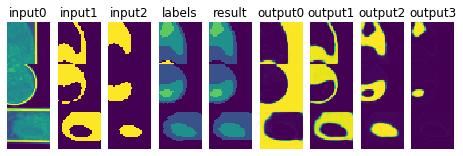

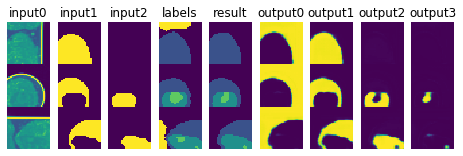

In [15]:
instance_c1.show_training_data(mode="train")
instance_c1.show_training_data(mode="validation")

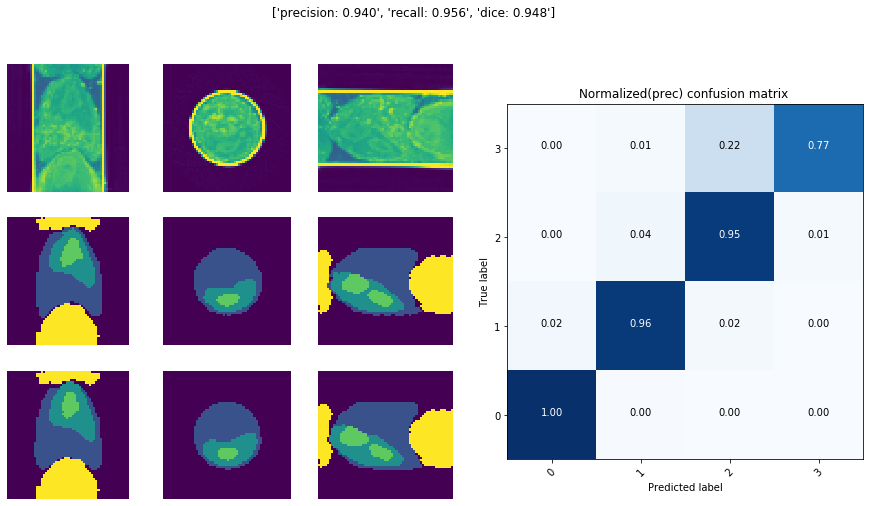

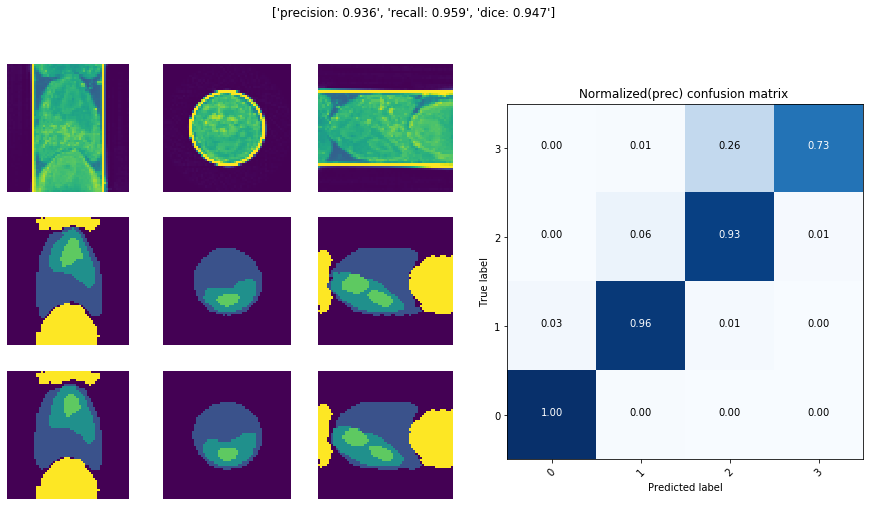

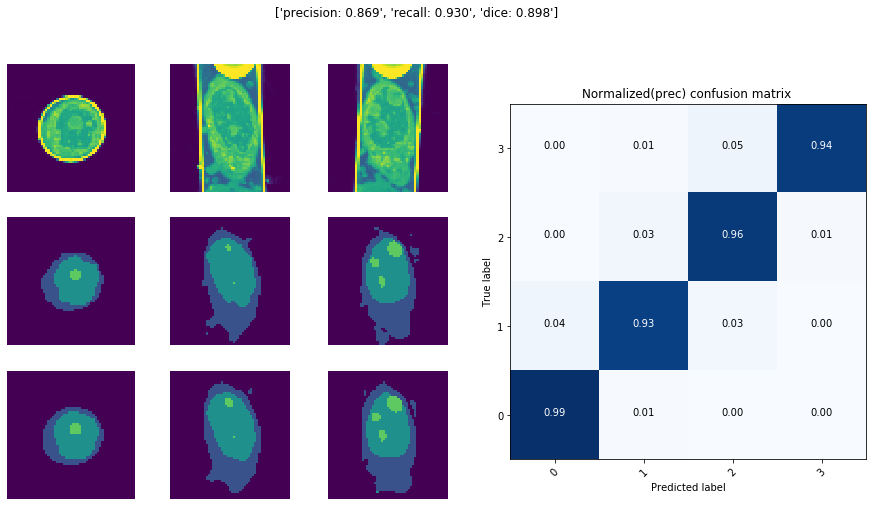

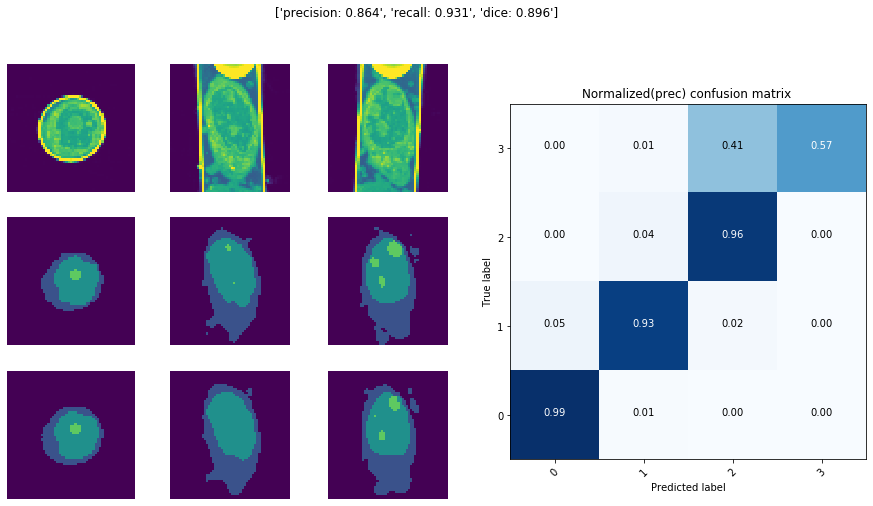

In [16]:
for index in instance_c1.valid_idx:
    _ = instance_c.evaluate_sample(index, plot=True)
    _ = instance_c1.evaluate_sample(index, plot=True)

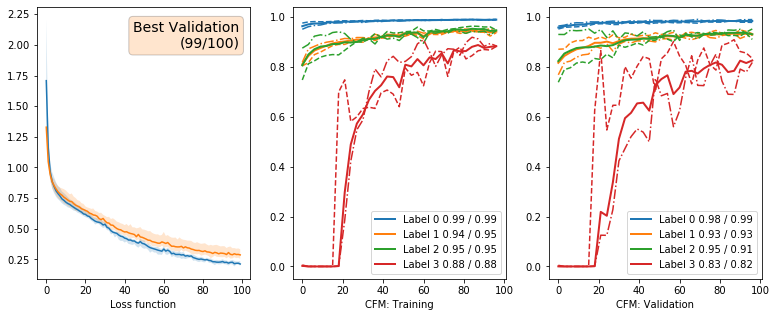

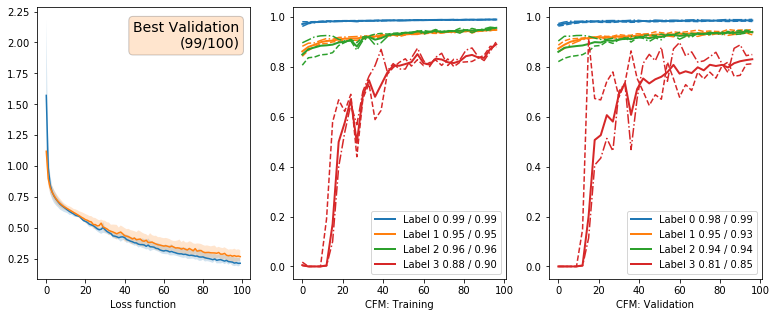

In [17]:
instance_c.logger.plot()
instance_c1.logger.plot()